## Introduction 
Solar energy installation is a significant investment, and estimating the energy output accurately before installation is crucial for stakeholders, such as energy companies, government agencies and homeowners. This can help improve budgeting, reduce unnecessary costs, and optimize resource allocation.
## Problem Definition
 
In recent years, the demand for renewable energy sources like solar power has increased significantly. Solar energy has a huge potential, but accurately predicting the energy potential from solar installations depends on various factors such as geographical location, building characteristics and environmental conditions. The goal of this project is to develop a predictive model that can estimate the energy potential for solar installations based on various input features.


## Project Overview 
This project aims to develop a machine learning model to predict the energy potential per year for solar installations based on various features such as geographical location, surface area, installation type, and technical parameters like tilt and capacity factor. The ultimate goal is to help solar energy companies, investors, and policymakers make informed decisions about potential solar energy projects by accurately forecasting their energy output and identifying the most efficient installation strategies.

## Objectives 
1. Predict the energy potential for solar installations using available data features.
2. Develop a robust machine learning model that can accurately predict the energy potential based on given features
3. Evaluate and fine-tune the model using performance metrics such as RMSE and R-squared to ensure accuracy

## Data Understanding 
### Source
The data for this study is sourced from ENERGYDATA.INFO, an open data platform providing access to datasets that are relevant to energy sector.
The data is available to governments, development organizations, private sector, non-governmental organizations, academia, civil society and individuals to share data and analytics that can help achieving the United Nations’ Sustainable Development Goal 7 of ensuring access to affordable, reliable, sustainable and modern energy for all. The data provides the perspective of Ethiopian Solar energy. 


### Data Description 

The dataset has 100 records and 10 features which are described below; 

Target Variable:

*Energy_potential_per_year*: The amount of energy (in kilowatt-hours or similar units) the solar panels can potentially generate annually.

Features:

*City*: Location where the solar panels are installed, which affects the solar irradiance and, thus, the energy potential.

*Surface_area*: The total surface area available for installing solar panels.

*Potential_installable_area*: The effective area that can be used for solar panels, which will influence the energy potential.

*Peak_installable_capacity*: The maximum energy the system can generate at peak performance, which is related to the energy potential.

*Assumed_building_type*: Different building types may have varying impacts on energy efficiency.

*Estimated_tilt*: The tilt angle of the panels affects their exposure to sunlight and, hence, the energy potential.

*Estimated_building_height*: Taller buildings may have more or less solar potential depending on shading and surrounding structures.

*Estimated_capacity_factor*: Represents the efficiency of the installation, affecting the annual energy yield.

*Date_added* : The date of installation, which might give insights into changes in technology over time (e.g., improving solar panel efficiency).

#### Target Variable 
My target variable is continous and since the objective is to model a classification problem, I will group the data into three categories of low, medium and high energy ouput. I will perform this during preprocessing stage. 

## Loading the data and Importing Libraries 

In [251]:
# import first batch of libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
# ignore warnings 
warnings.simplefilter(action='ignore', category=UserWarning)
# Load the data
data = pd.read_csv('./data/Ethiopia_SolarEnergy.csv')

In [252]:
# preview the first 3 rows
data.head(3)

,uuid,City,Surface_area,Potential_installable_area,Peak_installable_capacity,Energy_potential_per_year,Assumed_building_type,Estimated_tilt,Estimated_building_height,Estimated_capacity_factor,Unit_installation_price,Date_added,Comment,_inside_x,_inside_y
0,69ec4f04-ab53-4df7-8ac9-d2bbe3d54bf0,Addis Ababa,103.80,60.43,11.71,18962.27,single family residential,8.49,3.48,1619.00,NaN,20200726001723,NaN,465330.4349,995668.46635
1,f4339062-d3c1-4616-b5f8-eec46594461f,Addis Ababa,65.88,28.20,5.47,8280.46,single family residential,24.18,4.53,1513.81,NaN,20200726001723,NaN,465639.7500,991394.75000
2,66632445-cd35-4990-9ac7-cd90a6d93d93,Addis Ababa,187.25,83.59,16.22,24485.41,peri-urban settlement,13.81,4.32,1510.00,NaN,20200726001723,NaN,467833.7500,995783.50000


In [253]:
# check for the shape (rows and columns)
data.shape

(100, 15)

In [254]:
# check for null values 
print(data.isna().sum())


uuid                            0
City                            0
Surface_area                    0
Potential_installable_area      0
Peak_installable_capacity       0
Energy_potential_per_year       0
Assumed_building_type           0
Estimated_tilt                  0
Estimated_building_height       0
Estimated_capacity_factor       9
Unit_installation_price       100
Date_added                      0
Comment                       100
_inside_x                       0
_inside_y                       0
dtype: int64


From the above output, we have null and missing values from our features. The estimated capacity factor has 9 null values while while both unit installation price and comment have 100 missing values each. 

In [255]:
# preview the information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uuid                        100 non-null    object 
 1   City                        100 non-null    object 
 2   Surface_area                100 non-null    float64
 3   Potential_installable_area  100 non-null    float64
 4   Peak_installable_capacity   100 non-null    float64
 5   Energy_potential_per_year   100 non-null    float64
 6   Assumed_building_type       100 non-null    object 
 7   Estimated_tilt              100 non-null    float64
 8   Estimated_building_height   100 non-null    float64
 9   Estimated_capacity_factor   91 non-null     float64
 10  Unit_installation_price     0 non-null      float64
 11  Date_added                  100 non-null    int64  
 12  Comment                     0 non-null      float64
 13  _inside_x                   100 non-

In [256]:
# check value counts for categorical variable 
data["Assumed building type"].value_counts()

KeyError: 'Assumed building type'

## Data Cleaning and Preprocessing

### Cleaning 
Clean the data by either removing or imputing null values, removing non-important features to our course and converting our target variable to categorical since it is countinous.

#### Remove underscores 

In [91]:
# Reomeve underscores from column names and white sapces 
data.columns= data.columns.str.replace('_', ' ')

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uuid                        100 non-null    object 
 1   City                        100 non-null    object 
 2   Surface area                100 non-null    float64
 3   Potential installable area  100 non-null    float64
 4   Peak installable capacity   100 non-null    float64
 5   Energy potential per year   100 non-null    float64
 6   Assumed building type       100 non-null    object 
 7   Estimated tilt              100 non-null    float64
 8   Estimated building height   100 non-null    float64
 9   Estimated capacity factor   91 non-null     float64
 10  Unit installation price     0 non-null      float64
 11  Date added                  100 non-null    int64  
 12  Comment                     0 non-null      float64
 13   inside x                   100 non-


### imputing missing values for estimated capacity factor
first plot a histogram to check for distribution and skewness  

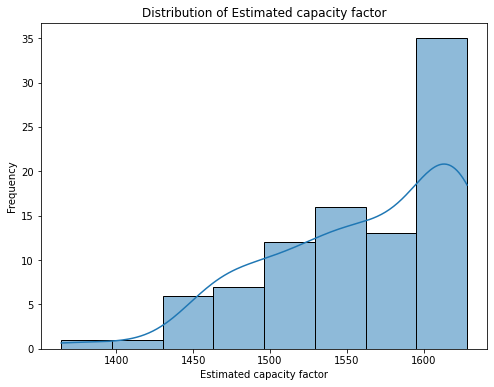

In [93]:
# plot a histogram to check distibution and skewness 
plt.figure(figsize=(8, 6))
sns.histplot(data["Estimated capacity factor"].dropna(), kde=True)
plt.title('Distribution of Estimated capacity factor')
plt.xlabel('Estimated capacity factor')
plt.ylabel('Frequency')
plt.show()


### Observation
From the observation above, the estimated capacity factor's is negatively skewed and hence the mean is less than the median and not normally distributed. We will therefore impute the missing values using the median value this feature. 

In [94]:
# replace missing values in estimated capacity factor with the median
data["Estimated capacity factor"]= data["Estimated capacity factor"].fillna(data["Estimated capacity factor"].median())

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uuid                        100 non-null    object 
 1   City                        100 non-null    object 
 2   Surface area                100 non-null    float64
 3   Potential installable area  100 non-null    float64
 4   Peak installable capacity   100 non-null    float64
 5   Energy potential per year   100 non-null    float64
 6   Assumed building type       100 non-null    object 
 7   Estimated tilt              100 non-null    float64
 8   Estimated building height   100 non-null    float64
 9   Estimated capacity factor   100 non-null    float64
 10  Unit installation price     0 non-null      float64
 11  Date added                  100 non-null    int64  
 12  Comment                     0 non-null      float64
 13   inside x                   100 non-

In [96]:
# drop columns with too many missing values 
data.drop(columns=["Comment","Unit installation price"], inplace=True, axis=1)

In [97]:
# drop non-essential columns 
data.drop(columns=[" inside y", " inside x", "uuid", "Date added", "City"], inplace =True)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Surface area                100 non-null    float64
 1   Potential installable area  100 non-null    float64
 2   Peak installable capacity   100 non-null    float64
 3   Energy potential per year   100 non-null    float64
 4   Assumed building type       100 non-null    object 
 5   Estimated tilt              100 non-null    float64
 6   Estimated building height   100 non-null    float64
 7   Estimated capacity factor   100 non-null    float64
dtypes: float64(7), object(1)
memory usage: 6.4+ KB


### Ouliers 
Check and remove outliers from our data. I will use a box plot to vizualize the distribution of data and possibly observe the presence of outliers. 

From the box  plot above, we can detect the presence of outliers from from our datafarme and therefore we must remove them if we are to realize our objective for modeling. 

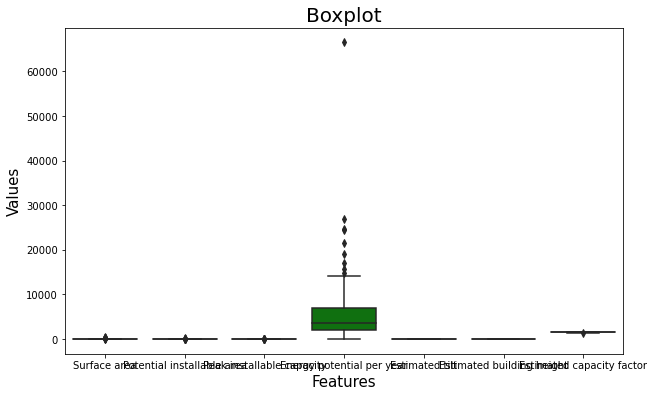

In [99]:

# Create a boxplot for the entire dataset
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, color='g')  # Create a boxplot for all columns in the DataFrame

# Add title and labels
plt.title('Boxplot', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize = 15)

# Show the plot
plt.show()

In [ ]:
# declare the lower, upper and interquartile ranges 
Q1 = data.quantile(0.25)  # First quartile for all columns
Q3 = data.quantile(0.75)  # Third quartile for all columns
IQR = Q3 - Q1  # Interquartile Range for all columns
lower_bound = Q1 - 1.5 * IQR  # Lower bound for all columns
upper_bound = Q3 + 1.5 * IQR  # Upper bound for all column

# check for outliers in the data 
iqr_outliers = (data < lower_bound) | (data > upper_bound)

# retain rows with no outliers 
data1 = data[(~iqr_outliers.any(axis=1))]
data1.shape

(89, 8)

After removing the outliers, we remain with 89 records and retain the 8 features. 

### Correlation 
After carryion out data cleaning, I will go a head with preprocessing to ensure our data is in the correct format for modeling. 

First, carry out correlation test to check how the features are correlated

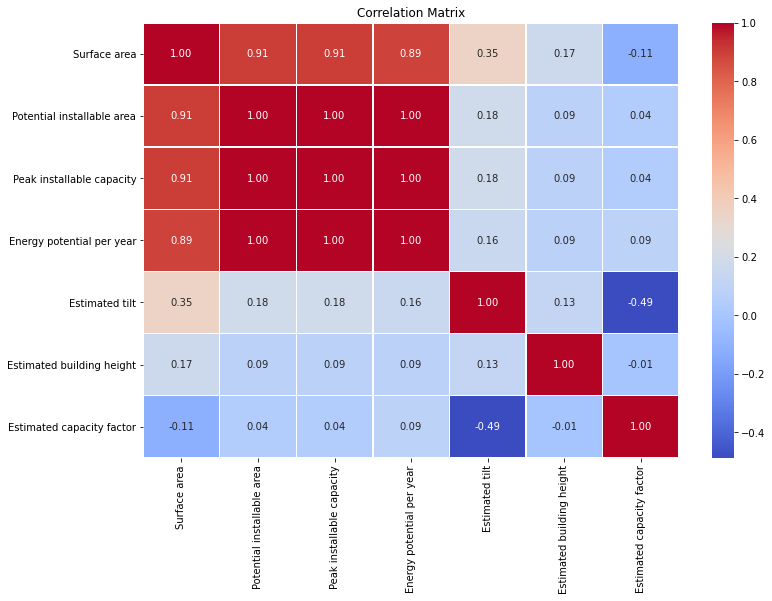

In [101]:
# correlation 
corr_matrix = data1.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Observation 
From the heatmap above, we can clearly note the features that are highly correlated, those with low correlation and those  which are negatively correlated. Variables; Surface area, potential installabe area, pick installabe capacity and energy potential per year have strong positive correlations ranging from 0.89 to 1 than the rest of the features. This indicates that when one variable inceases, the other tends to increase in a predictable manner.  

##### Pairplot 
Further, we can visualize the correlation using a pairplot to check the linearity and how the data points are scattered 

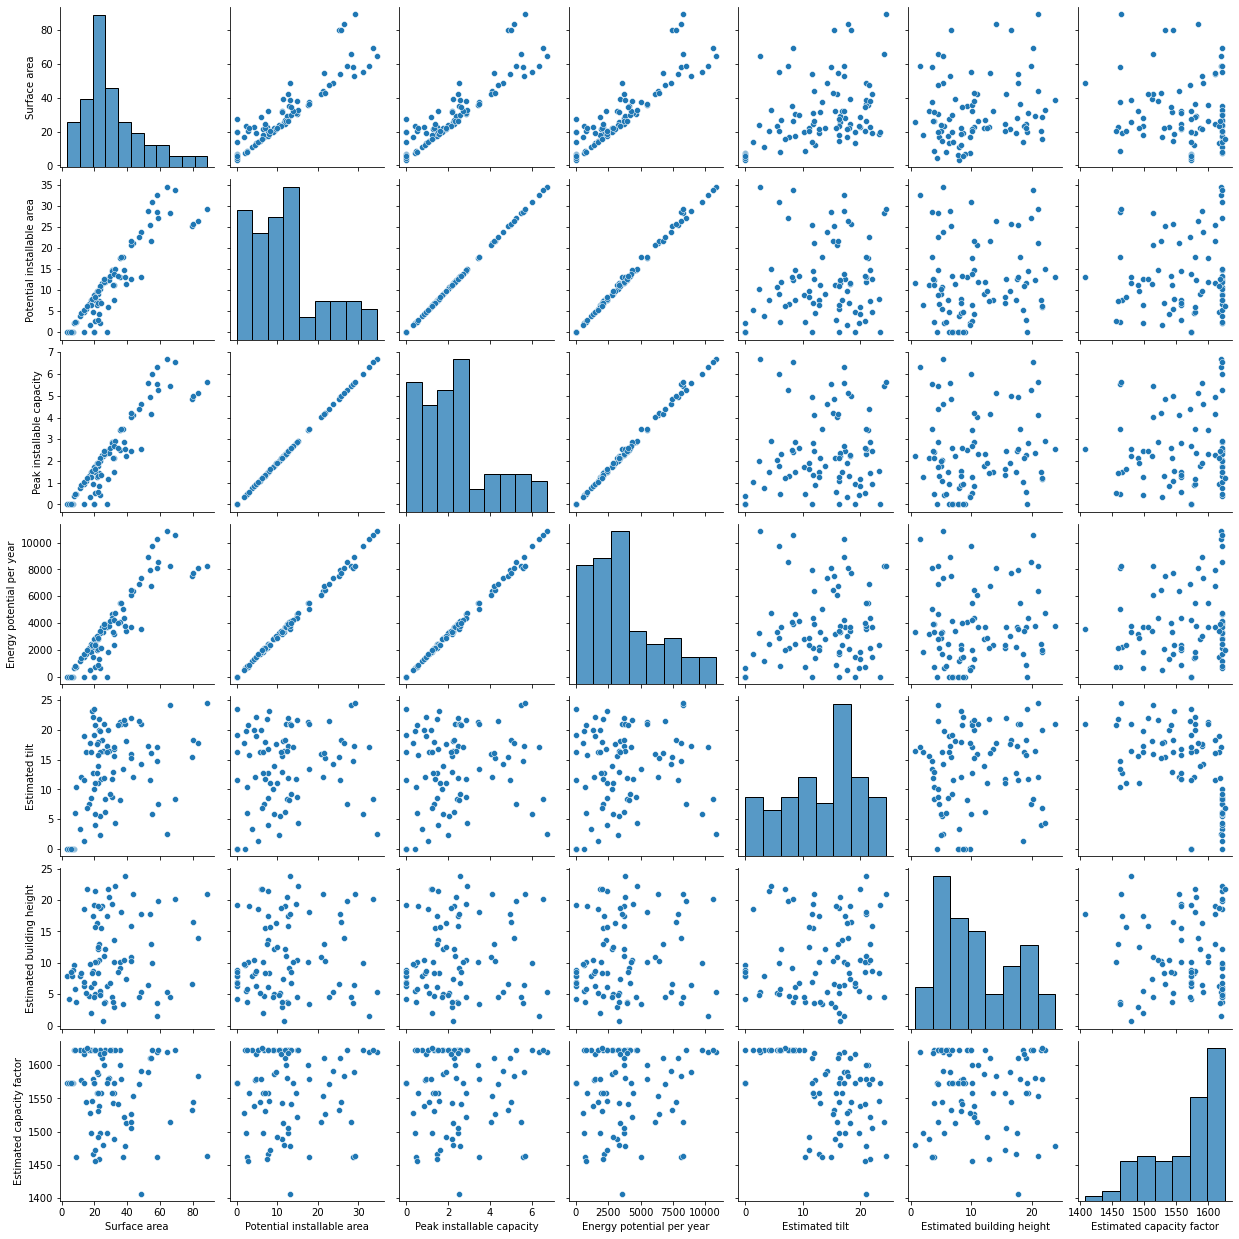

In [102]:
# plot a pairplot
sns.pairplot(data1)
plt.show()

### Observation 
The data points for features with strong positive correlation depicts a strong linear relationship while the rest are scattered all over meaning they have low or no correlation. 

## Preprocessing 
This study will underatake a preprocessing process to ensure the data points are in a scale that can be understood easily. I will perform log tranformattions to meet this. 

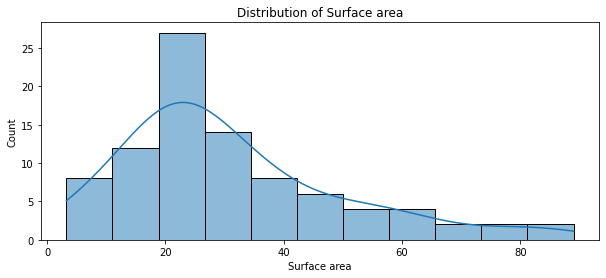

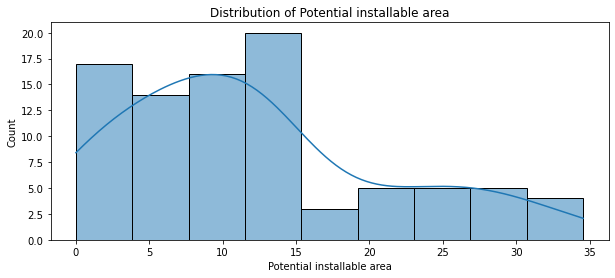

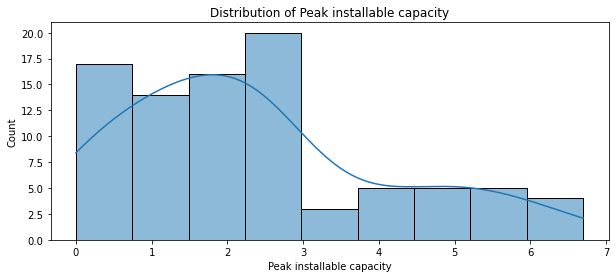

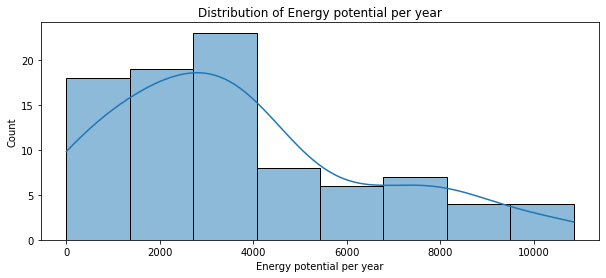

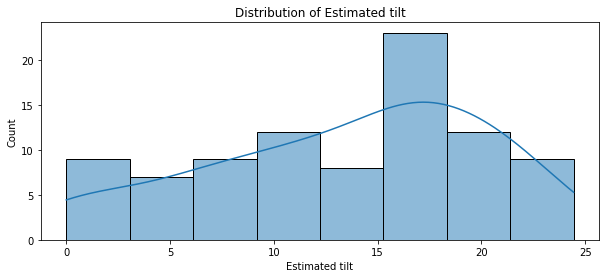

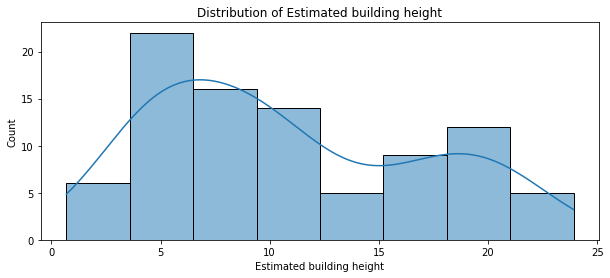

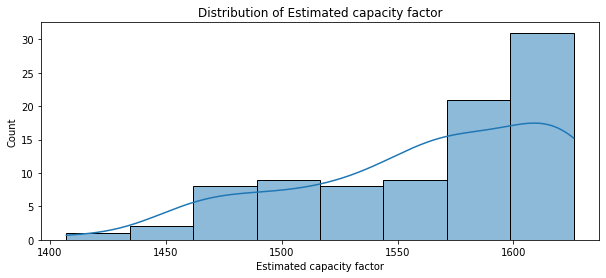

In [103]:
for column in data1.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data1[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

From the observations above, some of the faetures have a skewed distribution while others are near normal distribution for numerical data. I will perform log transformation on the data and excluding the non-numeric. 

In [104]:
# log transform the features 
log_transformed_data1 = np.log(np.abs(data1.drop(["Assumed building type"], axis=1)))
log_transformed_data1.reset_index(drop=True, inplace=True)

<ipython-input-104-ab0500d6c337>:2: RuntimeWarning: divide by zero encountered in log
  log_transformed_data1 = np.log(np.abs(data1.drop(["Assumed building type"], axis=1)))


In [ ]:
# preview the transformed data 
log_transformed_data1.head()

,Surface area,Potential installable area,Peak installable capacity,Energy potential per year,Estimated tilt,Estimated building height,Estimated capacity factor
0,4.187835,3.339322,1.699279,9.021654,3.185526,1.510722,7.322385
1,3.884241,3.166740,1.526056,8.898927,2.651833,1.673351,7.372281
2,3.268808,2.524928,0.883768,8.276725,2.122262,1.327075,7.391415
3,2.601949,1.564441,-0.072571,7.312073,2.946542,1.829376,7.388452
4,3.965564,3.362457,1.722767,9.093832,2.844909,1.862529,7.371282


### Encode categorical variables 
One variable (Assumed building type) is categorical and must be hot encoded before modeling. I will conduct encoding using sklearn library. 

In [117]:
# import the library 
from sklearn.preprocessing import OneHotEncoder
# instantiate the encoder 
encoder = OneHotEncoder(sparse=False)
encoded =encoder.fit_transform(data1[["Assumed building type"]])
encoded_data1 = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Assumed building type']))

encoded_data1.reset_index(drop=True, inplace=True)

c:\Users\Limo.Abraham\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Match the transformed and endoded dataframes into one.

In [192]:
# perform concatenation for the log transformed and encoded dataframes 
data2 = pd.concat([encoded_data1, log_transformed_data1], axis=1)
data2.head()

,Peri-Urban Settlement,Single Family Residential,Surface area,Potential installable area,Peak installable capacity,Energy potential per year,Estimated tilt,Estimated building height,Estimated capacity factor
0,0.0,1.0,4.187835,3.339322,1.699279,9.021654,3.185526,1.510722,7.322385
1,0.0,1.0,3.884241,3.166740,1.526056,8.898927,2.651833,1.673351,7.372281
2,0.0,1.0,3.268808,2.524928,0.883768,8.276725,2.122262,1.327075,7.391415
3,0.0,1.0,2.601949,1.564441,-0.072571,7.312073,2.946542,1.829376,7.388452
4,0.0,1.0,3.965564,3.362457,1.722767,9.093832,2.844909,1.862529,7.371282


##### Onehotencoder output 
After encoding, the results gave us two more columns from assumed building type instead of three. The third was ignored because it was underrepresented by value counts. 

In [ ]:
# Rename the columns
data2.rename(columns={
    "Single Family Residential": "Encoded_Single Family Residential",
    "Peri-Urban Settlement": "Encoded_Peri-Urban Settlement"
}, inplace=True)
data2.head()

,Encoded_Peri-Urban Settlement,Encoded_Single Family Residential,Surface area,Potential installable area,Peak installable capacity,Energy potential per year,Estimated tilt,Estimated building height,Estimated capacity factor
0,0.0,1.0,4.187835,3.339322,1.699279,9.021654,3.185526,1.510722,7.322385
1,0.0,1.0,3.884241,3.166740,1.526056,8.898927,2.651833,1.673351,7.372281
2,0.0,1.0,3.268808,2.524928,0.883768,8.276725,2.122262,1.327075,7.391415
3,0.0,1.0,2.601949,1.564441,-0.072571,7.312073,2.946542,1.829376,7.388452
4,0.0,1.0,3.965564,3.362457,1.722767,9.093832,2.844909,1.862529,7.371282


### Remove Negative infinities 
From the the dataframe we can note the presence of negative infinities after log transformation. These values may cause problems for our models and therefore they must be removed or replaced. I will replace these values by imputing with median value for each faeture. 

In [ ]:
# Replace -inf with median in each column with -nf. 
data2_clean = data2.replace(-np.inf, np.nan) # first replace -inf with NaN

data3 = data2_clean.fillna(data2_clean.median()) # replace NaN with the median 
data3.head()

,Encoded_Peri-Urban Settlement,Encoded_Single Family Residential,Surface area,Potential installable area,Peak installable capacity,Energy potential per year,Estimated tilt,Estimated building height,Estimated capacity factor
0,0.0,1.0,4.187835,3.339322,1.699279,9.021654,3.185526,1.510722,7.322385
1,0.0,1.0,3.884241,3.166740,1.526056,8.898927,2.651833,1.673351,7.372281
2,0.0,1.0,3.268808,2.524928,0.883768,8.276725,2.122262,1.327075,7.391415
3,0.0,1.0,2.601949,1.564441,-0.072571,7.312073,2.946542,1.829376,7.388452
4,0.0,1.0,3.965564,3.362457,1.722767,9.093832,2.844909,1.862529,7.371282


### Target Variable 
The target variable is continuous and since this project is modeling a classification problem, I will group the data points into three categories of low, medium and high estimated energy output per year. 

In [ ]:
# group data into 3 categories 
bins = [6, 8, 9, float('inf')] 
labels = ['Low', 'Medium', 'High']

# Create a new column 'Energy_category' for classification
data3['Potential Energy output'] = pd.cut(data3['Energy potential per year'], bins=bins, labels=labels)

In [217]:
# check for the final shape 
data3.shape

(89, 10)

We have 89 rows and 10 columns ready for modeling

## Data Spliting 
I will split my data into a ratio of 70: 30 i.e training to test sets. 

In [248]:
# import train test split library
from sklearn.model_selection import train_test_split

# declare X and y variables 
X = data3.drop(["Potential Energy output", "Energy potential per year"], axis=1)
y=data3["Potential Energy output"]

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic Regression 
I will use logistic regression as a baseline model for modeling 

In [266]:
# import libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# standardize features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# instantiate logistic regression model
model1 = LogisticRegression(max_iter=1000)

# train model1
model1.fit(X_train_scaled, y_train)

# predict on test set 
y_pred = model1.predict(X_test_scaled)

# evaluate the model1 using accuracy metric 

print("Accuracy: ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

Accuracy:  0.8148148148148148
              precision    recall  f1-score   support

        High       0.33      0.33      0.33         3
         Low       0.86      1.00      0.92         6
      Medium       0.88      0.83      0.86        18

    accuracy                           0.81        27
   macro avg       0.69      0.72      0.70        27
weighted avg       0.82      0.81      0.81        27



The model has good overall accuracy (81.48%).
The model performs poorly on the High class, with low precision, recall, and F1-score.
It performs well on the Low class, with perfect recall (1.00) and a good F1-score (0.92).
The model performs fairly well on the Medium class, with an F1-score of 0.86.
The macro average and weighted average provide insights into the model's performance, considering both the class imbalance and the overall performance.